In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=5

In [ ]:
dataset = keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Plant_Directory_updated',
 seed=123,
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE
)

Found 2400 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['peach_bacterial', 'peach_healthy']

In [ ]:
pip install future

In [ ]:
import keras
print('keras: %s' % keras.__version__)

keras: 2.14.0


In [ ]:
pip install --upgrade keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#from _future_ import print_function
import numpy as np
import warnings
import cv2 as cv
from keras.models import Model
from keras.layers import Flatten,Dense,Input,Conv2D,MaxPooling2D,BatchNormalization,Dropout
#from keras_applications.imagenet_utils import _obtain_input_shape
from keras.layers import Layer, InputSpec
from keras.models import Sequential

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
d_path="/content/drive/MyDrive/Plant_Directory/Dataset/"
dataset_path=os.listdir(d_path)
peach_type=os.listdir(d_path)
print(peach_type)
print("types of peach found:" , len(dataset_path))

['peach_healthy', 'peach_bacterial']
types of peach found: 2


In [ ]:
peaches=[]
for item in peach_type:
  all_peaches=os.listdir(d_path+ '/'+ item)
  for j,peach in enumerate(all_peaches):
    if(j==500):
      break
    peaches.append((item, str(d_path + '/' + item)+ '/'+ peach))
print(peaches)

[('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/6544ed11-a701-4a1a-8b7c-9cfbdfd8154c___Rutg._HL 3607_newPixel25.JPG'), ('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/65fa58a5-1f75-41d9-8d5f-a4a680c55e5a___Rutg._HL 2470_270deg.JPG'), ('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/65f9c558-af8e-4346-aab7-77f7d353e75a___Rutg._HL 3665_270deg.JPG'), ('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/64460ebe-57cb-4222-be13-02a5c43a1be7___Rutg._HL 3732_new30degFlipLR.JPG'), ('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/6544ed11-a701-4a1a-8b7c-9cfbdfd8154c___Rutg._HL 3607_270deg.JPG'), ('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/65f9c558-af8e-4346-aab7-77f7d353e75a___Rutg._HL 3665_new30degFlipLR.JPG'), ('peach_healthy', '/content/drive/MyDrive/Plant_Directory/Dataset//peach_healthy/659c5db9-c

In [ ]:
peaches_df=pd.DataFrame(data=peaches,columns=['Peach type','image'])
print(peaches_df.head())

      Peach type                                              image
0  peach_healthy  /content/drive/MyDrive/Plant_Directory/Dataset...
1  peach_healthy  /content/drive/MyDrive/Plant_Directory/Dataset...
2  peach_healthy  /content/drive/MyDrive/Plant_Directory/Dataset...
3  peach_healthy  /content/drive/MyDrive/Plant_Directory/Dataset...
4  peach_healthy  /content/drive/MyDrive/Plant_Directory/Dataset...


In [ ]:
print("total number of peaches in the dataset:" ,len(peaches_df))
peaches_count=peaches_df['Peach type'].value_counts()
print("peaches in each category:")
print(peaches_count)

total number of peaches in the dataset: 1000
peaches in each category:
peach_healthy      500
peach_bacterial    500
Name: Peach type, dtype: int64


In [ ]:
import cv2
im_size = 250
images=[]
labels=[]
for i in peach_type:
  data_path = d_path+str(i)
  filenames=[i for i in os.listdir(data_path)]

  for j,f in enumerate(filenames):
    if(j==500):
      break
    img=cv2.imread(data_path + '/' +f)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)


In [ ]:
images = np.array(images)
images=images.astype('float32')/255.0
images.shape

(1000, 250, 250, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
y=peaches_df['Peach type'].values
y_labelencoder=LabelEncoder()
y=y_labelencoder.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
y=y.reshape(-1,1)
print(y.shape)
print(images.shape)
onehotencoder = OneHotEncoder(categories='auto')
Y=onehotencoder.fit_transform(y)
print(Y.shape)

(1000, 1)
(1000, 250, 250, 3)
(1000, 2)


In [ ]:
Y=Y.toarray()

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
images,Y=shuffle(images,Y,random_state=1)

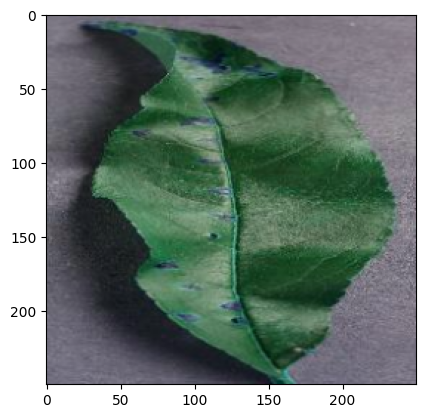

In [ ]:
plt.imshow(images[0])

In [ ]:

for i in images:
  i = cv.normalize(i, None, 0, 1.0,cv.NORM_MINMAX, dtype=cv.CV_32F)

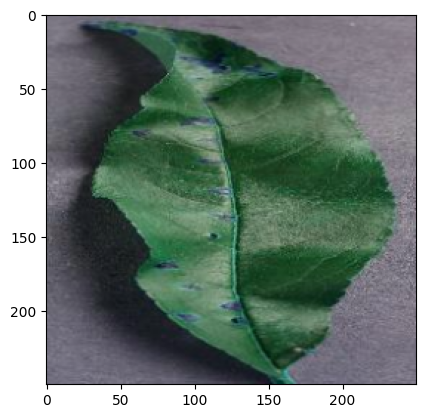

In [ ]:
plt.imshow(images[0])

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(images,Y,test_size=0.2,random_state=200)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(800, 250, 250, 3)
(800, 2)
(200, 250, 250, 3)
(200, 2)


In [ ]:
def Vggupdated(input_tensor=None,classes=2):
  img_rows,img_cols=250,250
  img_channels=3
  img_dim=(img_rows,img_cols,img_channels)

  img_input=Input(shape=img_dim)

  x=Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv1')(img_input)
  x=Conv2D(64,(3,3),activation='relu',padding='same',name='block1_conv2')(x)
  x=BatchNormalization()(x)
  x=MaxPooling2D((2,2),strides=(2,2),name='block1_pool')(x)

  x=Conv2D(128,(3,3),activation='relu',padding='same',name='block2_conv1')(x)
  x=Conv2D(128,(3,3),activation='relu',padding='same',name='block2_conv2')(x)
  x=BatchNormalization()(x)
  x=MaxPooling2D((2,2),strides=(2,2),name='block2_pool')(x)

  x=Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv1')(x)
  x=Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv2')(x)
  x=Conv2D(256,(3,3),activation='relu',padding='same',name='block3_conv3')(x)
  x=BatchNormalization()(x)
  x=MaxPooling2D((2,2),strides=(2,2),name='block3_pool')(x)

  x=Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv1')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv2')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same',name='block4_conv3')(x)
  x=BatchNormalization()(x)
  x=MaxPooling2D((2,2),strides=(2,2),name='block4_pool')(x)

  x=Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv1')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv2')(x)
  x=Conv2D(512,(3,3),activation='relu',padding='same',name='block5_conv3')(x)
  x=BatchNormalization()(x)
  x=MaxPooling2D((3,3),strides=(2,2),name='block5_pool')(x)

  x=Flatten(name='flatten')(x)
  x=Dense(2048,activation='relu', name='fc1')(x)
  x=Dense(2048,activation='relu', name='fc2')(x)
  x=Dropout(rate=0.3)(x)
  x=Dense(classes,activation='softmax', name='predictions')(x)

  model=Model(inputs = img_input,outputs = x,name='VGGdemo')
  return model


In [ ]:
model = Vggupdated(classes=2)

In [ ]:
import keras
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = [keras.metrics.Precision(), keras.metrics.Recall(),'accuracy'])

In [ ]:
model.summary()

Model: "VGGdemo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 250, 250, 64)      256       
 Normalization)                                                  
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                           

In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.003,verbose=1,patience=3)
earlyst=EarlyStopping(monitor="val_loss",verbose=1,mode="min",patience=10,restore_best_weights=True)
model_checkpoint = ModelCheckpoint('VGG.h5', save_best_only=True)
cb=[lr,model_checkpoint]


In [ ]:
import tensorflow as tf

# Define a custom callback function
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Your custom callback code here
        # This function is called at the end of each training epoch
        pass




In [ ]:
history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size = 32,callbacks=cb)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 14.9150 - precision: 0.7362 - recall: 0.7362 - accuracy: 0.7362

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 62s 1s/step - loss: 14.9150 - precision: 0.7362 - recall: 0.7362 - accuracy: 0.7362 - val_loss: 548.0826 - val_precision: 0.5000 - val_recall: 0.5000 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 31s 1s/step - loss: 1.3597 - precision: 0.8775 - recall: 0.8775 - accuracy: 0.8775 - val_loss: 1.6100 - val_precision: 0.6800 - val_recall: 0.6800 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 15s 613ms/step - loss: 0.8204 - precision: 0.9100 - recall: 0.9100 - accuracy: 0.9100 - val_loss: 7.3688 - val_precision: 0.6000 - val_recall: 0.6000 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 22s 902ms/step - loss: 0.6970 - precision: 0.9212 - recall: 0.9212 - accuracy: 0.9212 - val_loss: 0.5621 - val_precision: 0.8650 - val_recall: 0.8650 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 16s 63

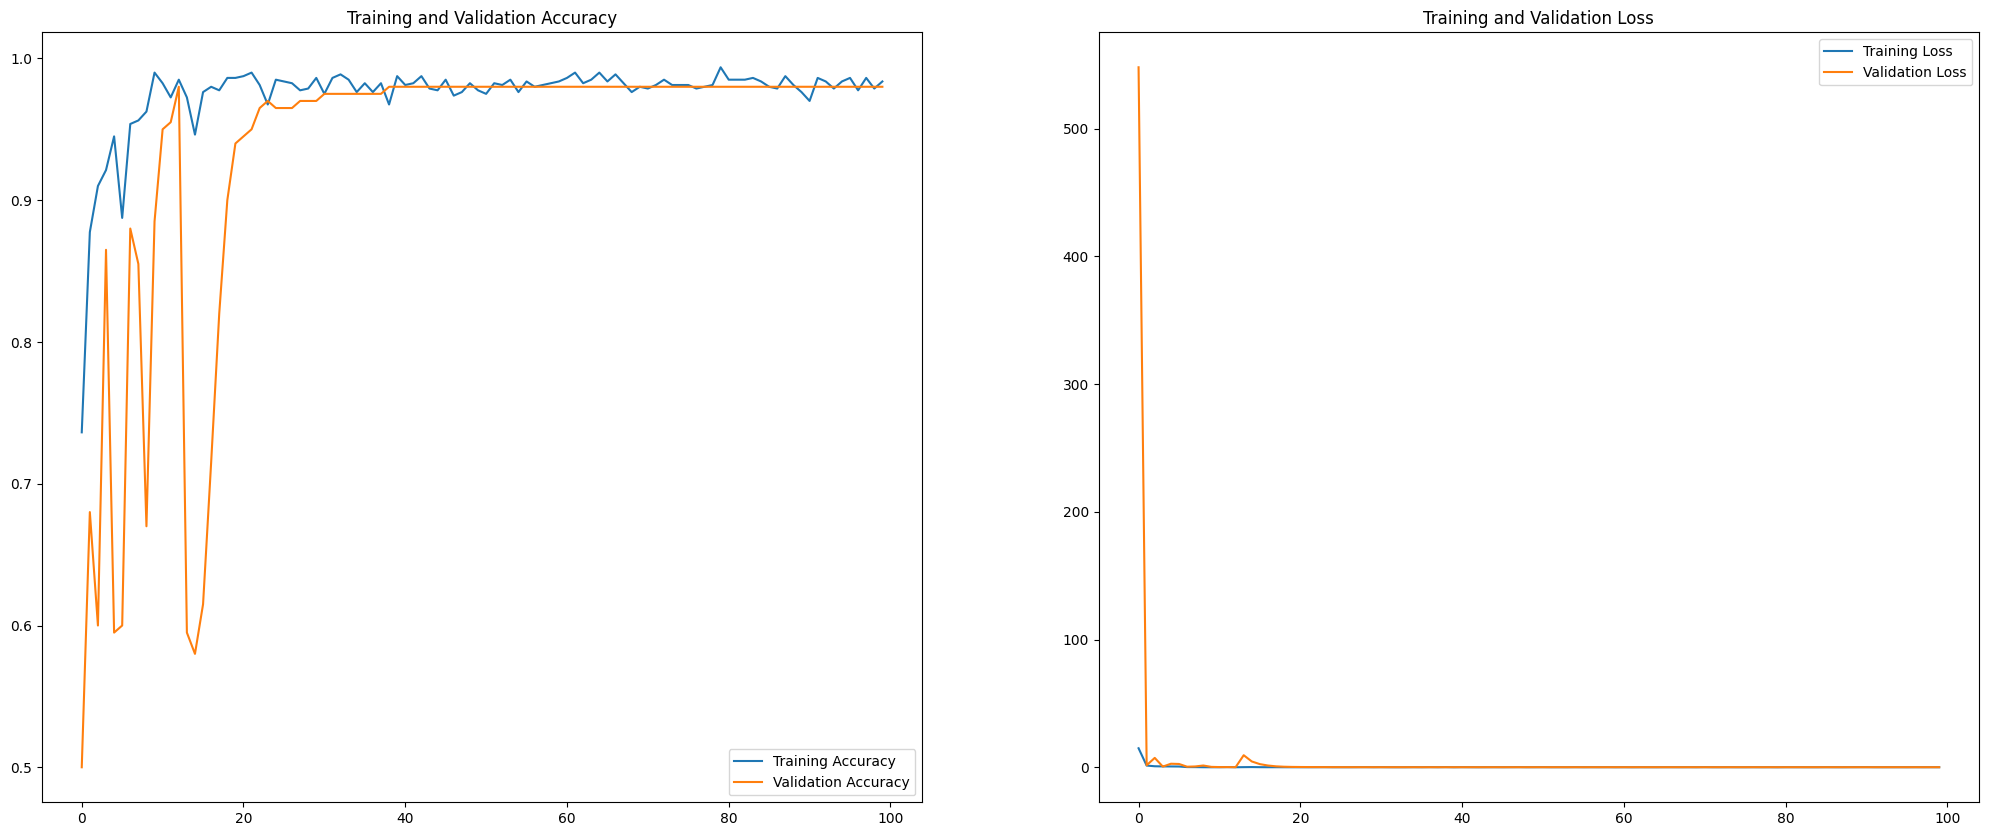

In [ ]:
import matplotlib.pyplot as plt

epochs=100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preds=model.evaluate(test_x,test_y)
print("loss="+ str(preds[0]))


7/7 [==============================] - 1s 153ms/step - loss: 0.0820 - precision: 0.9800 - recall: 0.9800 - accuracy: 0.9800
loss=0.08202400803565979


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


input image shape: (1, 250, 250, 3)


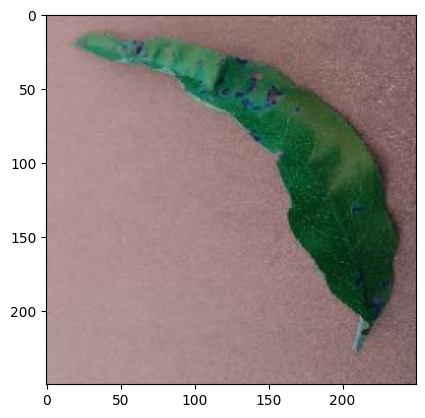

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import cv2 as cv
import numpy as np
img_path='/content/drive/MyDrive/Plant_Directory_updated/peach_bacterial/05000db3-4f6a-4e67-a2b8-98a3de04e58a___Rut._Bact.S 0809.JPG'
img=cv.resize(cv.imread(img_path),(250,250))
x=np.expand_dims(img,axis=0)
print('input image shape:',x.shape)
imshow(img)

In [ ]:
import keras
model=keras.models.load_model("/content/VGG.h5")

In [ ]:
result=model.predict(x)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(result)

[[0. 1.]]


In [ ]:
if(result[0][0]<result[0][1]):
  print(f"Image is healthy and i am {result[0][1]}% sure")
else:
  print(f"Image is bacterial and i am {result[0][0]}% sure")

Image is healthy and i am 1.0% sure


In [ ]:
pred = model.evaluate(test_x, test_y, batch_size=BATCH_SIZE)
print("Test Loss:", pred[0])
print("Test Accuracy:", pred[1])

7/7 [==============================] - 1s 151ms/step - loss: 0.0816 - precision: 0.9800 - recall: 0.9800 - accuracy: 0.9800
Test Loss: 0.0815863311290741
Test Accuracy: 0.9800000190734863


In [ ]:
def preprocess_image(img):
    img = cv2.resize(img, (im_size, im_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
new_image_path = '/content/drive/MyDrive/car.jpeg'
new_image = cv2.imread(new_image_path)
preprocessed_img = preprocess_image(new_image)
prediction = model.predict(preprocessed_img) #detected car as bacterial

class_names = ['Bacterial Spot', 'Healthy']
predicted_class = class_names[int(prediction[0][0] > 0.5)]

print(f"Predicted Class: {predicted_class}") #predicting correctly

1/1 [==============================] - 0s 322ms/step
Predicted Class: Bacterial Spot


7/7 [==============================] - 1s 165ms/step
[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0]
Confusion Matrix:
[[98  2]
 [ 2 98]]
Accuracy: 0.98
Precision: 0.98
Recall (Sensitivity): 0.98
F1 Score: 0.98


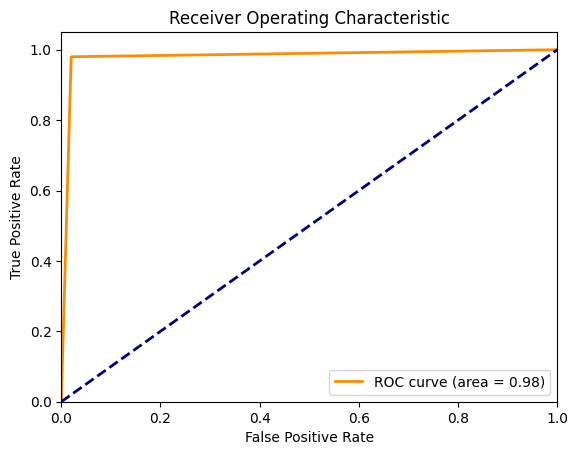

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(test_x)
y_pred_binary=[]
for i in y_pred:
  if(i[0]>0.5):
    y_pred_binary.append(0)
  else:
    y_pred_binary.append(1)
y_test_binary=[]
for i in test_y:
  if(i[0]==1):
    y_test_binary.append(0)
  else:
    y_test_binary.append(1)
print(y_pred_binary)
# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test_binary, y_pred_binary)
print("Recall (Sensitivity):", recall)

# F1 Score
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/VGG.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
